In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [12]:
df = pd.read_excel(r"C:\Users\maria\Downloads\sales data analysis\data\online_retail_II.xlsx")
df.head()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[us]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), object(3), str(1)
memory usage: 32.1+ MB


In [13]:
df[df.isnull().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [14]:
df.dropna(subset=['Customer ID'],inplace=True)
df.drop(df[df['Quantity']<0].index,inplace=True)
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month

In [15]:
df['Revenue']=df['Quantity']*df['Price']
Total_Revenue=df['Revenue'].sum()
Total_Quantity=df['Quantity'].sum()
Total_Order_number=df['Invoice'].nunique()


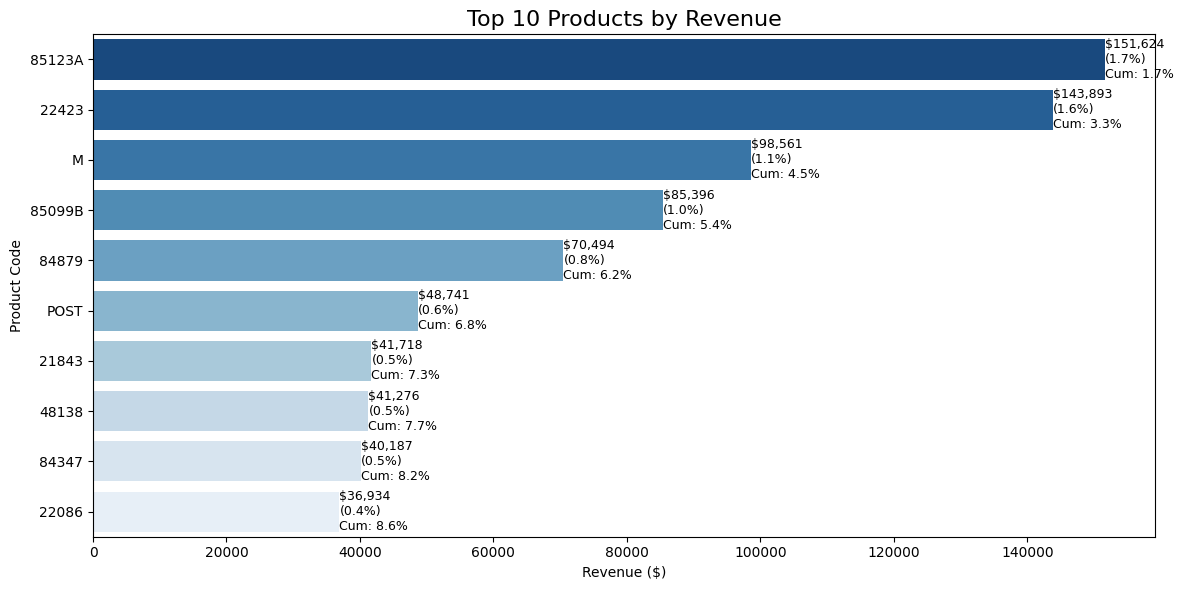

In [16]:
Top_Stock_by_Quantity=df.groupby("StockCode")['Quantity'].sum().sort_values(ascending=False).head(10)
Top_Stock_by_Revenue=df.groupby("StockCode")['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()
Top_Stock_by_Revenue['RevenuePct'] = Top_Stock_by_Revenue['Revenue'] / Total_Revenue * 100
Top_Stock_by_Revenue['CumulativePct'] = Top_Stock_by_Revenue['RevenuePct'].cumsum()

palette = sns.color_palette("Blues_r", n_colors=len(Top_Stock_by_Revenue))

plt.figure(figsize=(12,6))
barplot = sns.barplot(
    x='Revenue',
    y='StockCode',
    data=Top_Stock_by_Revenue,
    hue='StockCode',  
    palette=palette,
    dodge=False,
    legend=False          
)

for i, p in enumerate(barplot.patches):
    width = p.get_width()
    cumulative = Top_Stock_by_Revenue['CumulativePct'].iloc[i]
    barplot.annotate(
        f"${width:,.0f}\n({width/Total_Revenue*100:.1f}%)\nCum: {cumulative:.1f}%",
        (width, p.get_y() + p.get_height()/2),
        ha='left', va='center', fontsize=9
    )

plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Revenue ($)")
plt.ylabel("Product Code")
plt.tight_layout()
plt.show()


In [17]:
monthly_revenues=df.groupby(['Year','Month'])['Revenue'].sum()
monthly_revenues=monthly_revenues.reset_index()
monthly_revenues['YearMonth'] = monthly_revenues['Year'].astype(str) + '-' + monthly_revenues['Month'].astype(str).str.zfill(2)

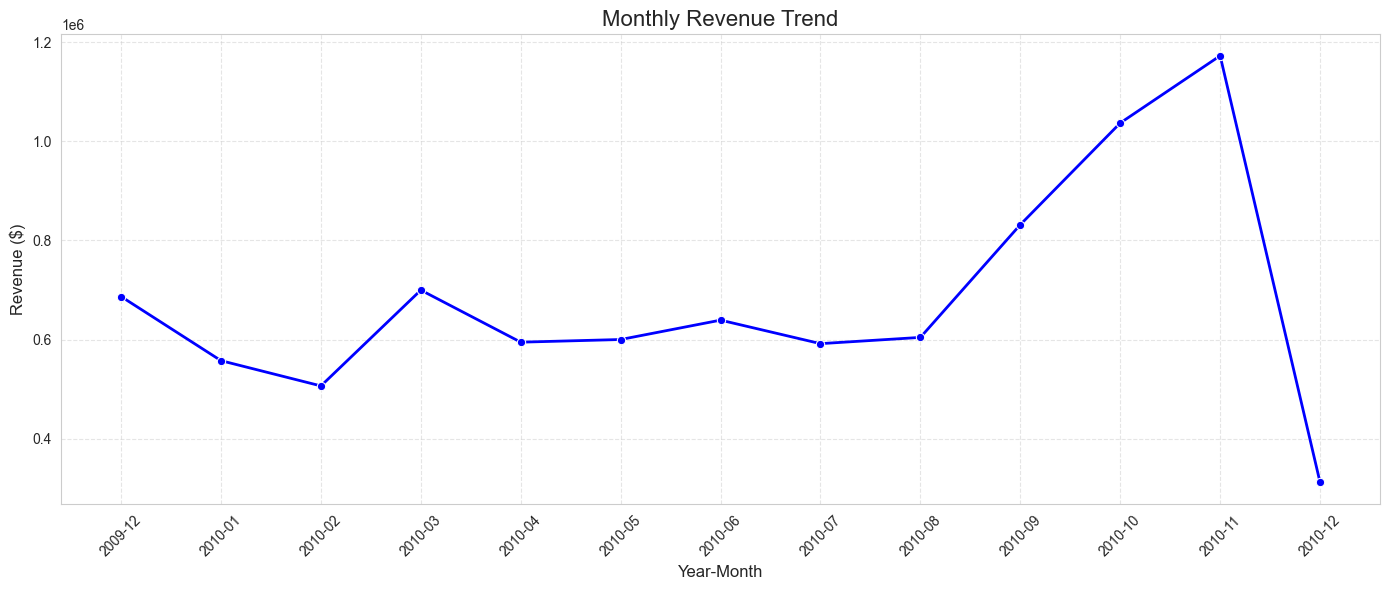

In [18]:
sns.set_style("whitegrid")

plt.figure(figsize=(14,6))
sns.lineplot(x='YearMonth', y='Revenue', data=monthly_revenues,
             marker='o', color='blue', linewidth=2)

plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [19]:
total_revenue_per_customer=df.groupby('Customer ID')['Revenue'].sum().reset_index()
Top_Customers_by_Revenue=total_revenue_per_customer.sort_values(by='Revenue',ascending=False).head(10)
Average_Revenue_per_Customer=total_revenue_per_customer['Revenue'].sum()/df['Customer ID'].nunique()


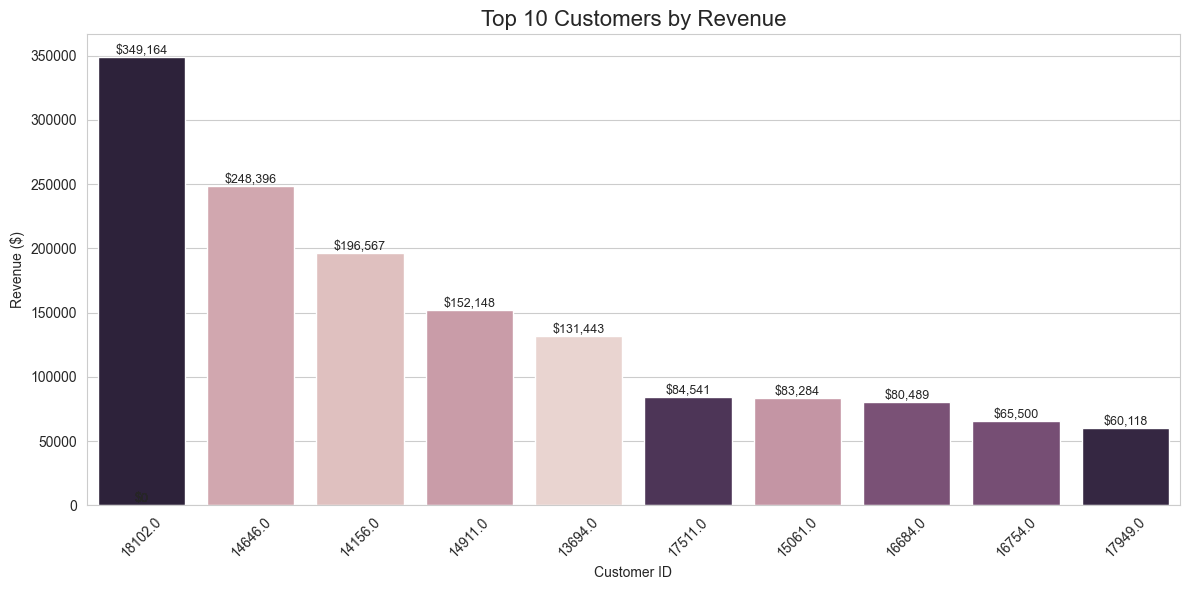

In [20]:
plt.figure(figsize=(12,6))


barplot = sns.barplot(
    x='Customer ID',
    y='Revenue',
    data=Top_Customers_by_Revenue,
    hue='Customer ID',
    order=Top_Customers_by_Revenue['Customer ID']
)

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'${height:,.0f}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom', fontsize=9)
    


plt.xticks(rotation=45)
plt.title("Top 10 Customers by Revenue", fontsize=16)
plt.xlabel("Customer ID")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.legend().remove()
plt.show()


In [21]:
AOV=Total_Revenue/Total_Order_number
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


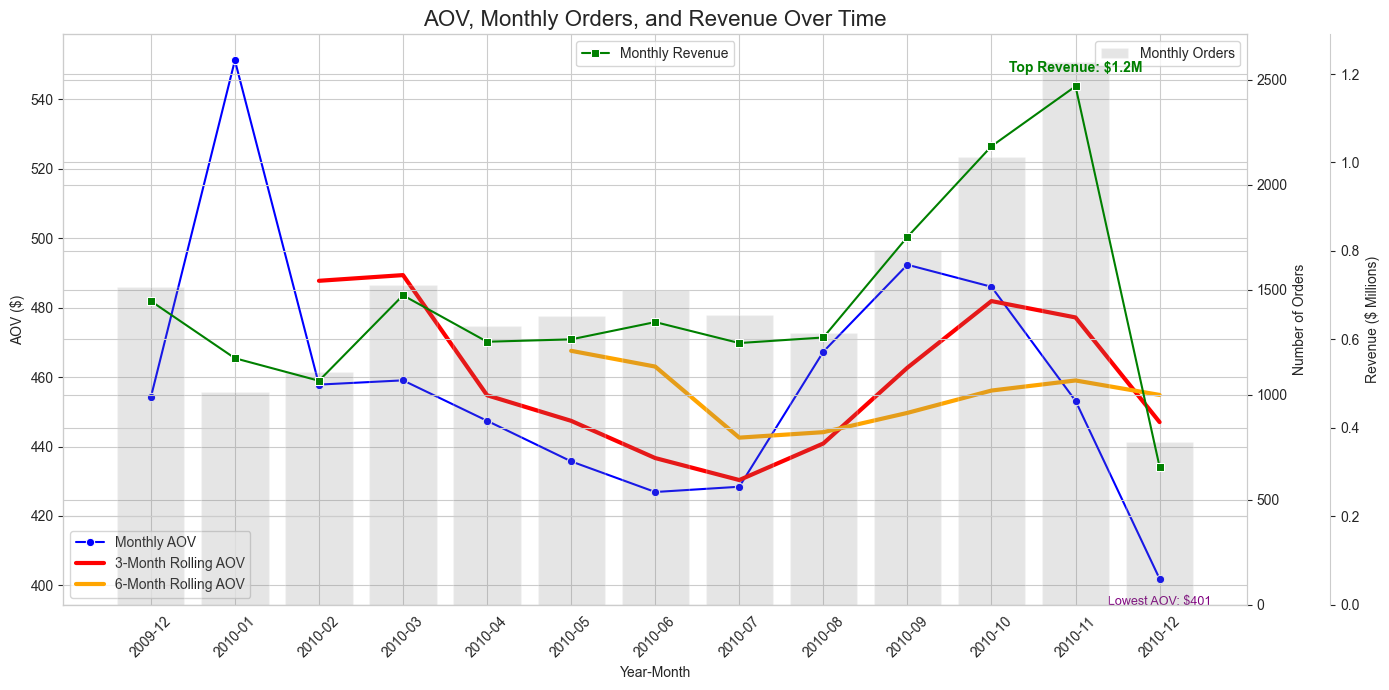

In [22]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('YearMonth')['Revenue'].sum()
monthly_orders = df.groupby('YearMonth')['Invoice'].nunique()
monthly_aov = monthly_revenue / monthly_orders

low_value_month = monthly_aov.sort_values().head(1)
high_value_month = monthly_revenue.sort_values(ascending=False).head(1)

rolling_aov_3 = monthly_aov.rolling(window=3).mean()
rolling_aov_6 = monthly_aov.rolling(window=6).mean()
monthly_revenue_m = monthly_revenue / 1e6

sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(14,7))


sns.lineplot(x=monthly_aov.index.astype(str), y=monthly_aov.values, marker='o',
             label='Monthly AOV', color='blue', ax=ax1)
sns.lineplot(x=rolling_aov_3.index.astype(str), y=rolling_aov_3.values, 
             label='3-Month Rolling AOV', color='red', linewidth=3, ax=ax1)
sns.lineplot(x=rolling_aov_6.index.astype(str), y=rolling_aov_6.values, 
             label='6-Month Rolling AOV', color='orange', linewidth=3, ax=ax1)

for idx, val in low_value_month.items():
    ax1.text(str(idx), val-5, f'Lowest AOV: ${int(val)}', ha='center', va='top', fontsize=9, color='purple')

ax1.set_xlabel("Year-Month")
ax1.set_ylabel("AOV ($)")
ax1.tick_params(axis='x', rotation=45)


ax2 = ax1.twinx()
ax2.bar(monthly_orders.index.astype(str), monthly_orders.values, alpha=0.2, color='grey', label='Monthly Orders')
ax2.set_ylabel("Number of Orders")

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
sns.lineplot(x=monthly_revenue_m.index.astype(str), y=monthly_revenue_m.values, marker='s',
             label='Monthly Revenue', color='green', ax=ax3)
ax3.set_ylabel("Revenue ($ Millions)")
ax3.set_ylim(0, monthly_revenue_m.max() * 1.1)

for idx, val in high_value_month.items():
    ax3.annotate(f'Top Revenue: ${val/1e6:.1f}M', xy=(str(idx), val/1e6), xytext=(0,10), 
                 textcoords='offset points', ha='center', color='green', fontsize=10, fontweight='bold')

ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
ax3.legend(loc='upper center')

plt.title("AOV, Monthly Orders, and Revenue Over Time", fontsize=16)
plt.tight_layout()
plt.show()


In [23]:
Revenue_By_Country=df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
Country_orders=df.groupby('Country')['Invoice'].nunique().sort_values(ascending=False)
AOV_Per_Country=Revenue_By_Country/Country_orders
Revenue_Per_Customer_Country=Revenue_By_Country/df.groupby('Country')['Customer ID'].nunique()
Top_Stock_Country_by_Revenue=Revenue_By_Country.head(10)


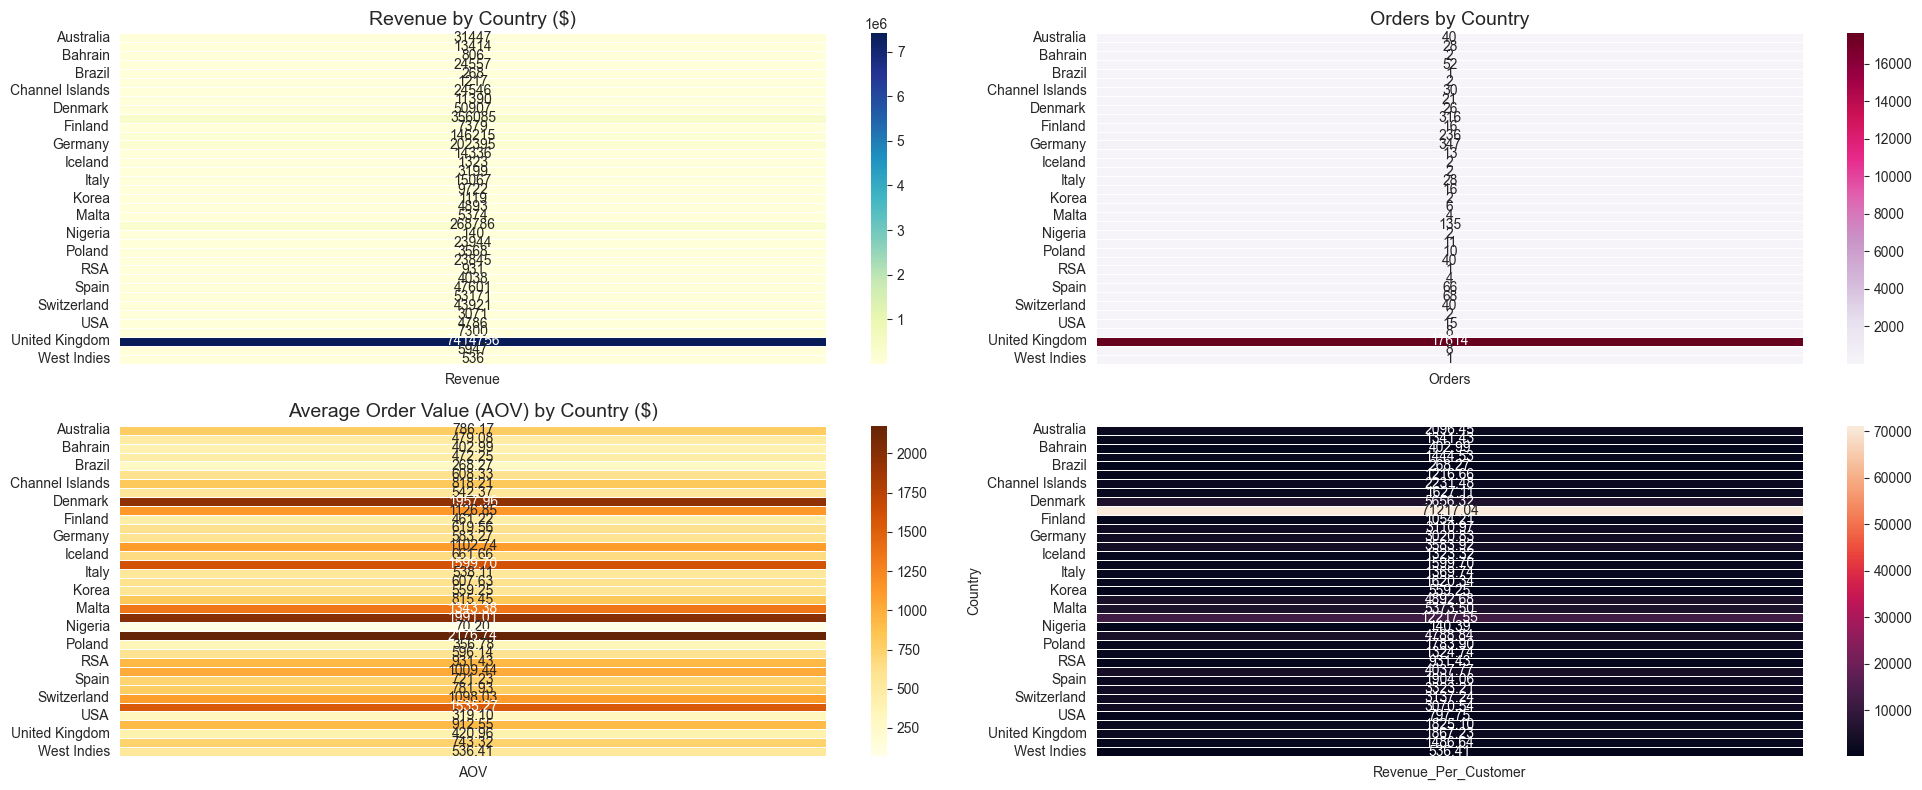

In [24]:
country_df = pd.DataFrame({
    'Revenue': Revenue_By_Country,
    'Orders': Country_orders,
    'AOV': AOV_Per_Country,
    'Revenue_Per_Customer':Revenue_Per_Customer_Country
})


fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes=axes.flatten()
sns.heatmap(
    data=country_df[['Revenue']],
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor="white",
    ax=axes[0]
)
axes[0].set_title("Revenue by Country ($)", fontsize=14)
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.heatmap(
    data=country_df[['Orders']],
    annot=True,
    fmt=".0f",
    cmap="PuRd",
    linewidths=0.5,
    linecolor="white",
    ax=axes[1]
)
axes[1].set_title("Orders by Country", fontsize=14)
axes[1].set_ylabel("")
axes[1].set_xlabel("")

sns.heatmap(
    data=country_df[['AOV']],
    annot=True,
    fmt=".2f",
    cmap="YlOrBr",
    linewidths=0.5,
    linecolor="white",
    ax=axes[2]
)
axes[2].set_title("Average Order Value (AOV) by Country ($)", fontsize=14)
axes[2].set_ylabel("")
axes[2].set_xlabel("")

sns.heatmap(
    data=country_df[['Revenue_Per_Customer']],
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor="white",
    ax=axes[3]

)
plt.tight_layout()
plt.show()


In [25]:
df['Profit']=df['Revenue']-df['Quantity']*df['Price']*0.7
df['Profit_Margin']=df['Profit']/df['Revenue']*100
Total_Revenue_Per_Stock=df.groupby("StockCode")['Revenue'].sum()
Total_Profit_Per_Stock=df.groupby("StockCode")['Profit'].sum()

agg = df.groupby("StockCode").agg({
    'Revenue': 'sum',
    'Profit': 'sum'
})

agg['Profit_Margin'] = (agg['Profit'] / agg['Revenue']) * 100
high_rev_low_profit = agg.sort_values(by=['Revenue', 'Profit_Margin'], ascending=[False, True]).head(10)



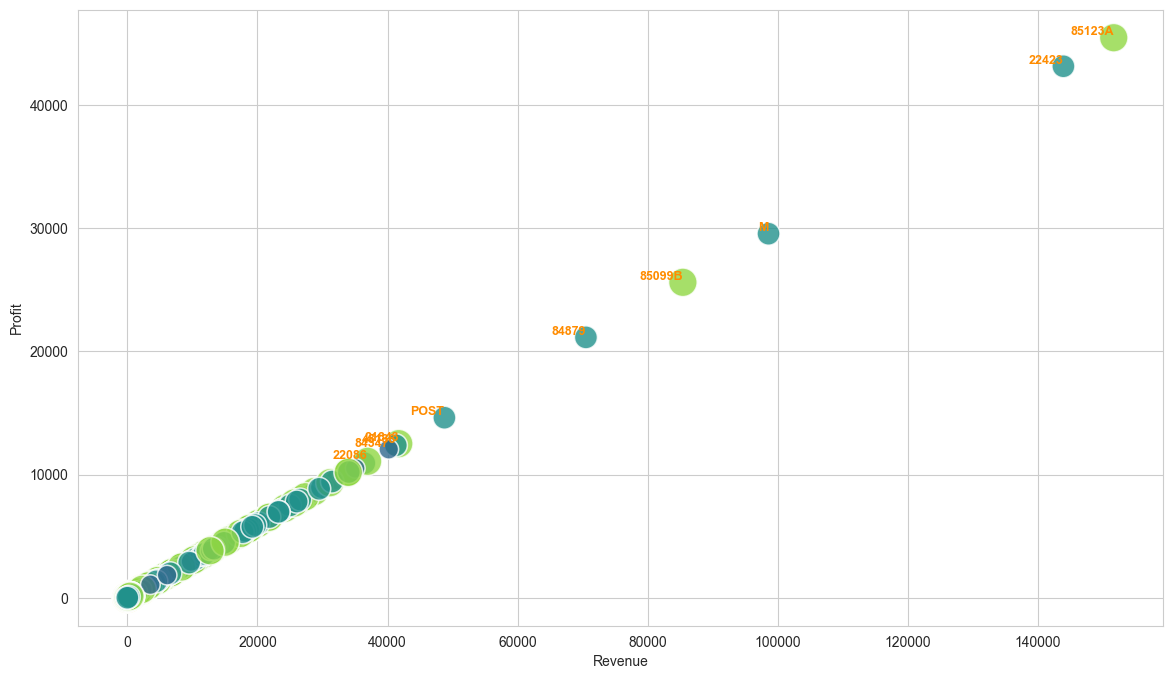

In [26]:
plt.figure(figsize=(14,8))
scatter = sns.scatterplot(
    x='Revenue',
    y='Profit',
    sizes=(50,500),
    size='Profit_Margin',
    hue='Profit_Margin',    
    palette='viridis',
    data=agg,
    legend='brief',
    alpha=0.8
)

for idx in high_rev_low_profit.index:
    x = agg.loc[idx, 'Revenue']
    y = agg.loc[idx, 'Profit']
    scatter.text(
        x, y, idx, 
        fontsize=9, color='darkorange', weight='bold',
        ha='right', va='bottom'
    )

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


Revenue_Per_Customer=df.groupby('Customer ID')['Revenue'].sum()
Quantity_per_Customer=df.groupby('Customer ID')['Quantity'].sum()
Order_Amount=df.groupby('Customer ID')['Invoice'].nunique()

scaling_df=pd.DataFrame({
    'Revenue':Revenue_Per_Customer,
    'Quantity':Quantity_per_Customer,
     'Order_Amount':Order_Amount
})


scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaling_df)
scaled_df=pd.DataFrame(data=scaled_features, columns=scaling_df.columns, index=scaling_df.index)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)
labels=kmeans.labels_
scaled_df['Cluster_Value']=labels
print(labels)
#print(scaled_df.groupby("Cluster_Value").mean())
cluster_labels={0: 'Occasional Buyer', 3: 'Bulk Bargain Hunter', 1: 'Steady Regular', 2: 'Premium Loyalist', 4: 'Platinum VIP'}

scaled_df['Label']=scaled_df['Cluster_Value'].map(cluster_labels)

scaled_df.groupby('Label').size()

[0 0 0 ... 0 0 0]


Label
Bulk Bargain Hunter     306
Occasional Buyer       3980
Platinum VIP              2
Premium Loyalist          4
Steady Regular           22
dtype: int64

Text(0.5, 0.92, 'Customer Segmentation 3D View')

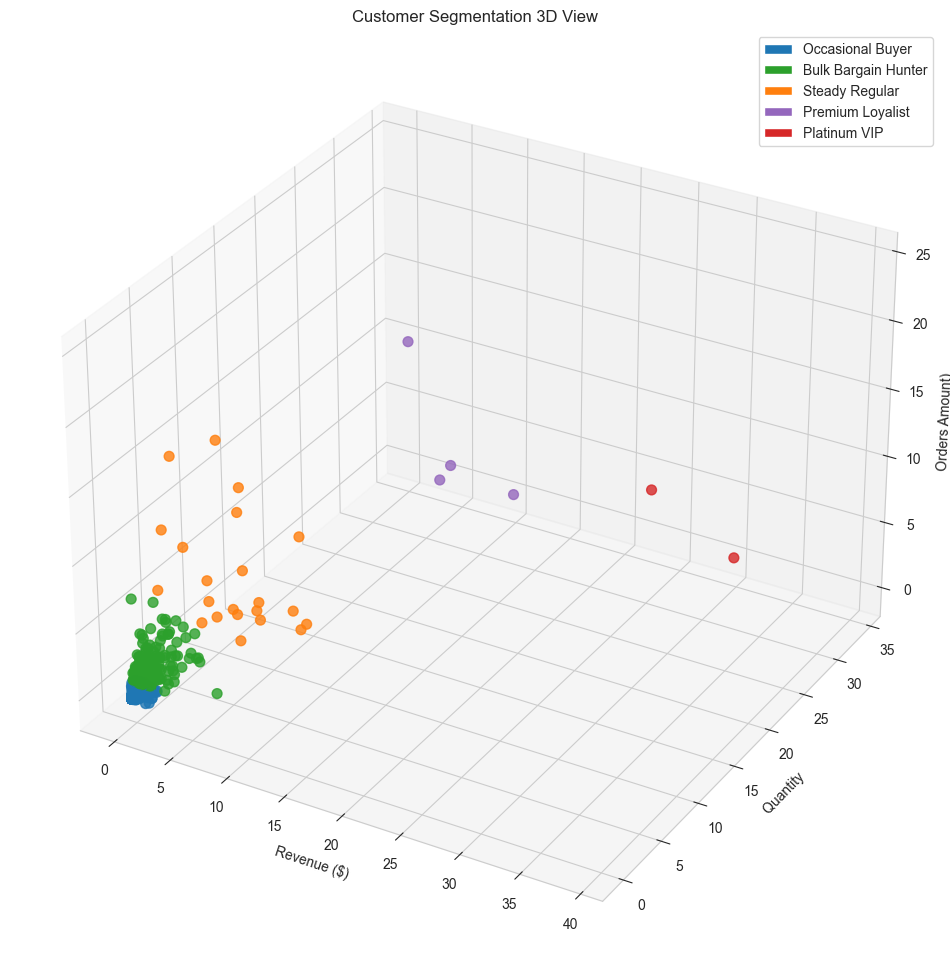

In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



color_dict = {
    'Occasional Buyer': '#1f77b4',       
    'Bulk Bargain Hunter': '#2ca02c',   
    'Steady Regular': '#ff7f0e',         
    'Premium Loyalist': '#9467bd',       
    'Platinum VIP': '#d62728'            
}

colors = scaled_df['Label'].map(color_dict)

fig = plt.figure(figsize=(12,14))
ax = plt.axes(projection='3d')
legend_elements = [Patch(facecolor=color_dict[label], label=label) for label in color_dict]

ax.scatter(
        scaled_df['Revenue'],
        scaled_df['Quantity'],
        scaled_df['Order_Amount'],
        c=colors,
        alpha=0.8,
        s=50
    )

ax.legend(handles=legend_elements)
ax.set_xlabel('Revenue ($)')
ax.set_ylabel('Quantity ')
ax.set_zlabel('Orders Amount)')
ax.set_title('Customer Segmentation 3D View')



In [29]:
from sklearn.linear_model import LinearRegression


data = monthly_revenue.reset_index()
data['Month_Num'] = range(1, len(data) + 1)
data['Revenue_Smooth'] = data['Revenue'].rolling(window=3).mean()
data['YearMonth_dt'] = data['YearMonth'].dt.to_timestamp()

# Use smoothed revenue for training and accurate predications
smoothed_data = data.dropna(subset=['Revenue_Smooth'])

x=smoothed_data[['Month_Num']]  
y = smoothed_data['Revenue_Smooth']  
model = LinearRegression()
model.fit( x, y)
predicted_month= [[ x['Month_Num'].max()+1]]

predicted_revenue=model.predict(predicted_month)


smoothed_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 11 entries, 2 to 12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   YearMonth       11 non-null     period[M]     
 1   Revenue         11 non-null     float64       
 2   Month_Num       11 non-null     int64         
 3   Revenue_Smooth  11 non-null     float64       
 4   YearMonth_dt    11 non-null     datetime64[us]
dtypes: datetime64[us](1), float64(2), int64(1), period[M](1)
memory usage: 572.0 bytes


c:\Users\maria\Downloads\sales data analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


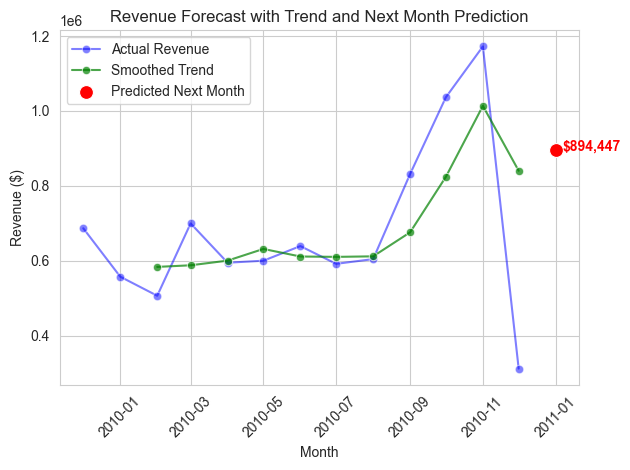

In [30]:
predicted_month = data['YearMonth'].iloc[-1] + 1
predicted_month_dt = predicted_month.to_timestamp()

sns.lineplot(
    x=data['YearMonth_dt'],
    y=data['Revenue'],
    marker='o',
    label='Actual Revenue',
    color='blue',
    alpha=0.5
)


sns.lineplot(
    x=smoothed_data['YearMonth_dt'],
    y=smoothed_data['Revenue_Smooth'],
    marker='o',
    label='Smoothed Trend',
    color='green',
    alpha=0.7
)

sns.scatterplot(
    x=[predicted_month_dt],
    y=[predicted_revenue[0]],
    s=100,
    color='red',
    label='Predicted Next Month'
)


plt.text(predicted_month, predicted_revenue[0],
         f"${predicted_revenue[0]:,.0f}", ha='center', color='red', fontweight='bold')

plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.title('Revenue Forecast with Trend and Next Month Prediction')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()






In [31]:
from datetime import datetime
from sklearn.linear_model import LogisticRegression

now = datetime.now()

Order_per_Customer = df.groupby('Customer ID')['Invoice'].nunique()
Avg_Order_Value=Revenue_Per_Customer/Order_per_Customer
Date_Invoice_per_Customer=df.groupby('Customer ID')['InvoiceDate'].max()

customer_df=pd.DataFrame({
'Revenue':Revenue_Per_Customer,
'Orders':Order_per_Customer,
'Quantity': Quantity_per_Customer,
'AOV':Avg_Order_Value
})
customer_df['Recency']=( now-Date_Invoice_per_Customer).dt.days
customer_df['Repeat'] = (customer_df['Orders'] > 1).astype(int)


x= customer_df[['Revenue', 'Orders', 'Quantity', 'AOV', 'Recency']]
y = customer_df['Repeat']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, test_size=0.3, shuffle=True, stratify=y, random_state=40
)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)
coeff_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

#“Customers who spend more overall (high Revenue) are more likely to come back, while those with very high average orders (AOV) or who buy many items at once (Quantity) are slightly less likely to repeat; the number of past orders (Orders) and how long ago they bought (Recency) have only small effects.”
print(coeff_df)

[1 1 1 ... 1 1 1]
    Feature  Coefficient
0   Revenue     0.612082
1    Orders     0.008911
4   Recency    -0.000745
2  Quantity    -0.017385
3       AOV    -0.678891


C:\Users\maria\AppData\Local\Temp\ipykernel_42180\3669006601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')


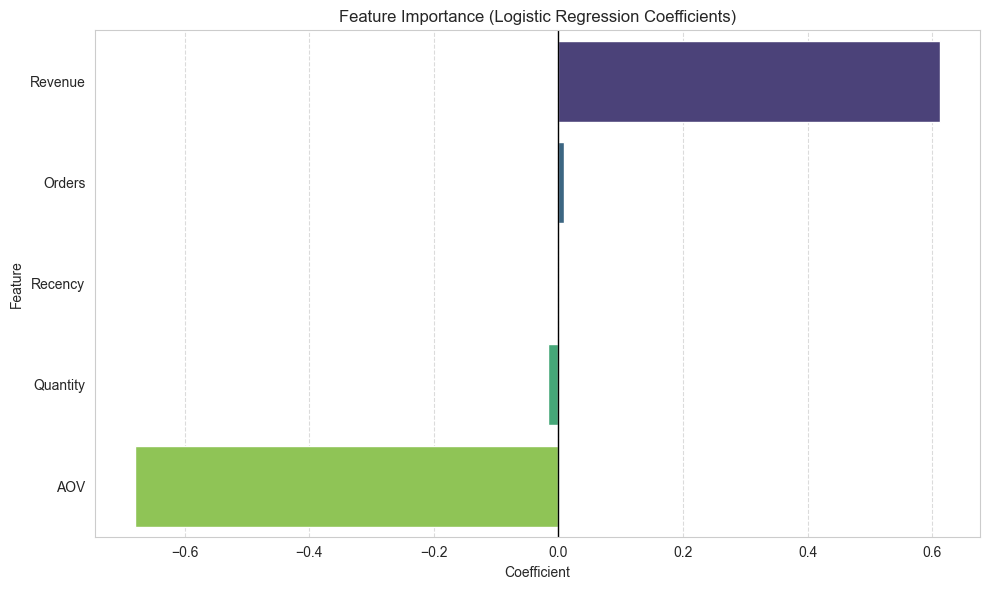

In [32]:


plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.axvline(0, color='black', lw=1) # Add a vertical line at zero
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred,y_test)
print("Confusion Matrix:\n", cm)
"""

Confusion Matrix:
[[427   0]
 [  0 868]]

Commentary:
- The model perfectly classified all customers in the test set.
  - One-time customers: 427 correctly identified
  - Repeat customers: 868 correctly identified
  - No misclassifications (FP = 0, FN = 0)
- Accuracy = 100%, Precision = 1.0, Recall = 1.0, F1-score = 1.0
- Strong predictive features: Revenue, Orders, Quantity, AOV, Recency
- Business implications:
  - Target repeat customers confidently for loyalty programs
  - Focus retention strategies on one-time buyers
- Note: Perfect classification is unusual; check with future or unseen data for generalization.
"""


Confusion Matrix:
 [[427   0]
 [  0 868]]


'\n\nConfusion Matrix:\n[[427   0]\n [  0 868]]\n\nCommentary:\n- The model perfectly classified all customers in the test set.\n  - One-time customers: 427 correctly identified\n  - Repeat customers: 868 correctly identified\n  - No misclassifications (FP = 0, FN = 0)\n- Accuracy = 100%, Precision = 1.0, Recall = 1.0, F1-score = 1.0\n- Strong predictive features: Revenue, Orders, Quantity, AOV, Recency\n- Business implications:\n  - Target repeat customers confidently for loyalty programs\n  - Focus retention strategies on one-time buyers\n- Note: Perfect classification is unusual; check with future or unseen data for generalization.\n'

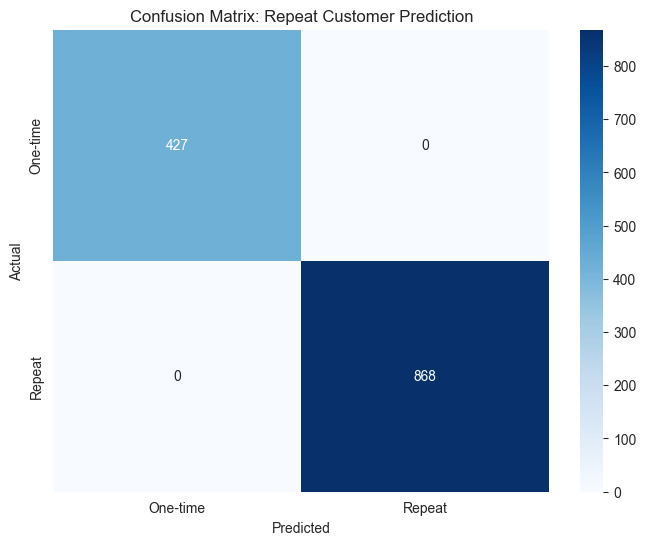

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['One-time', 'Repeat'], 
            yticklabels=['One-time', 'Repeat'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Repeat Customer Prediction')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


"""
Classification Report Summary:

- Class 0 (One-time customers):
    - Precision: 1.00 → All predicted one-time customers were correct
    - Recall: 1.00 → All actual one-time customers were correctly identified
    - F1-score: 1.00 → Perfect balance between precision and recall
    - Support: 427 → Number of one-time customers in test set

- Class 1 (Repeat customers):
    - Precision: 1.00 → All predicted repeat customers were correct
    - Recall: 1.00 → All actual repeat customers were correctly identified
    - F1-score: 1.00 → Perfect prediction
    - Support: 868 → Number of repeat customers in test set

- Overall:
    - Accuracy: 1.00 → All predictions correct
    - Macro Avg: 1.00 → Average of both classes
    - Weighted Avg: 1.00 → Weighted by number of samples per class

Business Implications:
- The model can perfectly distinguish repeat vs one-time customers in this dataset.
- Strong predictive features: Revenue, Orders, Quantity, AOV, Recency.
- Allows confident targeting for marketing and retention campaigns.
- Note: Perfect classification is rare; always validate on future/unseen data.
"""


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       1.00      1.00      1.00       868

    accuracy                           1.00      1295
   macro avg       1.00      1.00      1.00      1295
weighted avg       1.00      1.00      1.00      1295



'\nTask 12 — Repeat Customer Prediction\n\nClassification Report Summary:\n\n- Class 0 (One-time customers):\n    - Precision: 1.00 → All predicted one-time customers were correct\n    - Recall: 1.00 → All actual one-time customers were correctly identified\n    - F1-score: 1.00 → Perfect balance between precision and recall\n    - Support: 427 → Number of one-time customers in test set\n\n- Class 1 (Repeat customers):\n    - Precision: 1.00 → All predicted repeat customers were correct\n    - Recall: 1.00 → All actual repeat customers were correctly identified\n    - F1-score: 1.00 → Perfect prediction\n    - Support: 868 → Number of repeat customers in test set\n\n- Overall:\n    - Accuracy: 1.00 → All predictions correct\n    - Macro Avg: 1.00 → Average of both classes\n    - Weighted Avg: 1.00 → Weighted by number of samples per class\n\nBusiness Implications:\n- The model can perfectly distinguish repeat vs one-time customers in this dataset.\n- Strong predictive features: Revenue

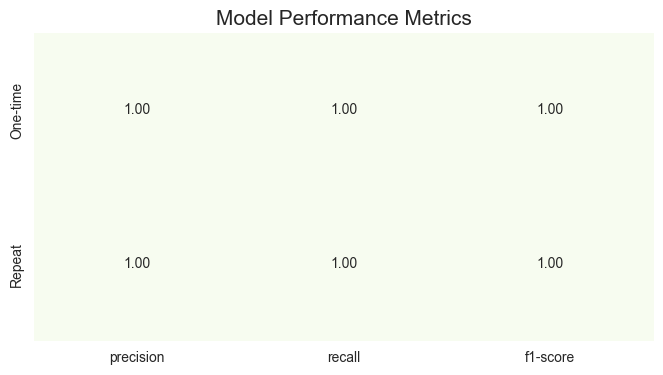

In [45]:
report = classification_report(y_test, y_pred, 
                               target_names=['One-time', 'Repeat'], 
                               output_dict=True)

df_report = pd.DataFrame(report).iloc[:-1, :2].T 

plt.figure(figsize=(8, 4))
sns.heatmap(df_report, annot=True, cmap='GnBu', cbar=False, fmt='.2f')
plt.title('Model Performance Metrics', fontsize=15)
plt.show()

In [ ]:
y_prob = model.predict_proba(x)[:,1]
customer_df['Repeat_Probability'] = y_prob.round(3)
customer_df['Repeat_Probability_pct'] = (customer_df['Repeat_Probability']*100).round(1)

top_customers = customer_df.sort_values(by='Repeat_Probability', ascending=False).head(10)
medium_prob = top_customers[(top_customers['Repeat_Probability'] > 0.3) & 
                            (top_customers['Repeat_Probability'] < 0.7)]



C:\Users\maria\AppData\Local\Temp\ipykernel_42180\341255965.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Segment', data=segment_counts, palette='viridis')


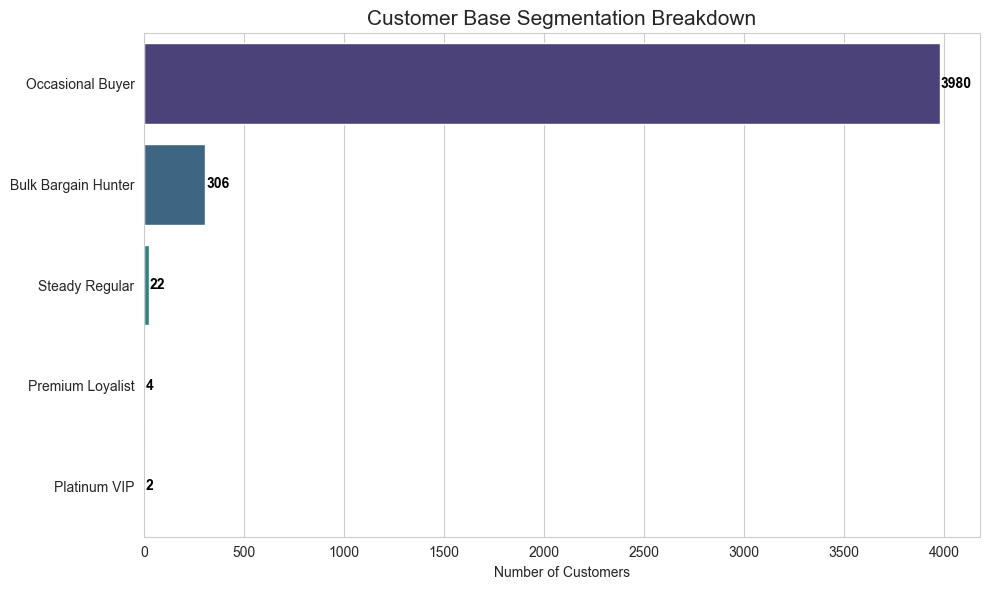

In [37]:
segment_counts = scaled_df['Label'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Segment', data=segment_counts, palette='viridis')


for i, v in enumerate(segment_counts['Count']):
    plt.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Customer Base Segmentation Breakdown', fontsize=15)
plt.xlabel('Number of Customers')
plt.ylabel('')
plt.tight_layout()
plt.show()